In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import gym, rec_gym
from rec_gym import env_1_args

import numpy as np

In [3]:
env_1_args

{'K': 4,
 'num_items': 100,
 'num_recommendations': 1,
 'num_users': 20,
 'embedding_dimension': 2,
 'cluster_var': 16,
 'in_cluster_var': 0.5,
 'active_user_change_proba': 0.1,
 'noise_sigma': 2,
 'user_drifting_kernel': <function rec_gym.envs.prim_env_v1.<lambda>(x)>,
 'user_drift_autoreg_coef': 0.1,
 'user_drift_sigma': 4,
 'user_type': 'drifting',
 'seed': 42}

In [4]:
env = gym.make('prim-gym-v1')
env.init_gym(env_1_args);

(100, 2)


In [5]:
observation, reward, done, info = env.step(1)
users, items, active_user = observation

In [6]:
for i in range(20):
    action = np.random.choice(env._n_actions)
    observation, reward, done, info = env.step(action)
    print(f"Step: {i} - Action: {action} - Observation: {observation} - Reward: {reward}")

Step: 0 - Action: 92 - Observation: (array([[ 0.49671415, -0.1382643 ],
       [ 0.64768854,  1.52302986],
       [-0.23415337, -0.23413696],
       [ 1.57921282,  0.76743473],
       [-0.46947439,  0.54256004],
       [-0.46341769, -0.46572975],
       [ 0.24196227, -1.91328024],
       [-1.72491783, -0.56228753],
       [-1.01283112,  0.31424733],
       [-0.90802408, -1.4123037 ],
       [ 1.46564877, -0.2257763 ],
       [-0.66286297, -1.19387278],
       [-0.54438272,  0.11092259],
       [-1.15099358,  0.37569802],
       [-0.60063869, -0.29169375],
       [-0.60170661,  1.85227818],
       [-0.01349722, -1.05771093],
       [ 0.82254491, -1.22084365],
       [ 0.2088636 , -1.95967012],
       [-1.32818605,  0.19686124]]), array([[-1.50792555,  4.17699109],
       [-1.05600953, -1.42306095],
       [-7.2708641 , -2.89812497],
       [-0.80142048, -1.3356955 ],
       [-2.5317591 ,  4.78504177],
       [ 3.53549341, -0.1777937 ],
       [-5.73197233, -2.93201805],
       [-2.32340

In [7]:
img = env.render(mode='rgb_array')

In [8]:
import matplotlib.pylab as plt
%matplotlib inline

In [9]:
img.shape

(500, 500, 3)

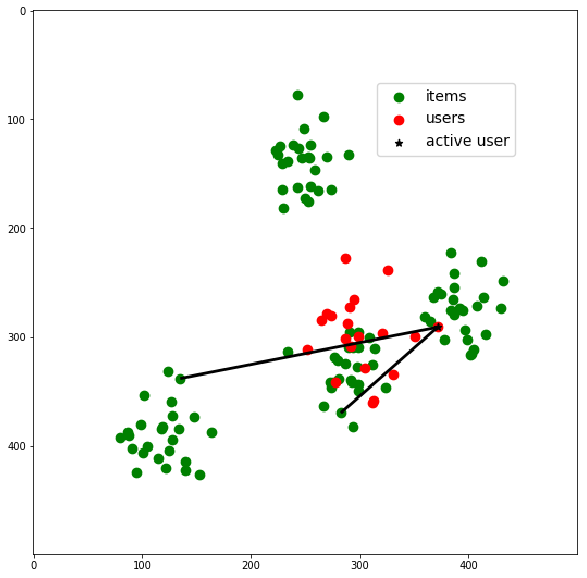

In [10]:
plt.figure(figsize=(10, 10))
plt.imshow(img)

In [11]:
#record sessions
from tqdm import tqdm_notebook

import gym.wrappers
env = gym.make("prim-gym-v1")
env.init_gym(env_1_args)
env = gym.wrappers.Monitor(env,directory="videos",force=True)

env.reset()
for i in tqdm_notebook(range(1000)):
    action = np.random.choice(env.unwrapped._n_actions)
    observation, reward, done, info = env.step(action)
env.close()


(100, 2)


In [12]:
!ls ./videos/

openaigym.episode_batch.0.12074.stats.json
openaigym.manifest.0.12074.manifest.json
openaigym.video.0.12074.video000000.meta.json
openaigym.video.0.12074.video000000.mp4


In [13]:
#show video
from IPython.display import HTML
import os

video_names = list(filter(lambda s:s.endswith(".mp4"),os.listdir("./videos/")))

HTML("""
<video width="640" height="480" controls>
  <source src="{}" type="video/mp4">
</video>
""".format("./videos/"+video_names[-1]))